In [8]:
'''
usar mesma semente para obter mesmo numeros aleatórios
'''
import numpy 

numpy.random.seed(42) ; numpy.random.rand(4)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [41]:
'''
Pacotes Essenciais
'''
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from pandas_datareader import data 
import scipy.optimize as sco
import numpy as np

np.random.seed(777)

In [47]:
'''
Baixar cotação
'''
papeis = ['WEGE3.SA','ETER3.SA','MGLU3.SA','CNTO3.SA','TRIS3.SA','BTOW3.SA','CSAN3.SA']
cotacoes = pd.DataFrame()

def baixar_dados(acoes):
    dados = data.DataReader(acoes, data_source = 'yahoo', start = '1/12/2019', end = '04/12/2020')['Adj Close']
    return dados

#baixar dados
cotacoes = baixar_dados(papeis)    

#apagar nan
cotacoes.fillna(method = 'bfill', inplace = True)

Text(0, 0.5, 'Valor em R$')

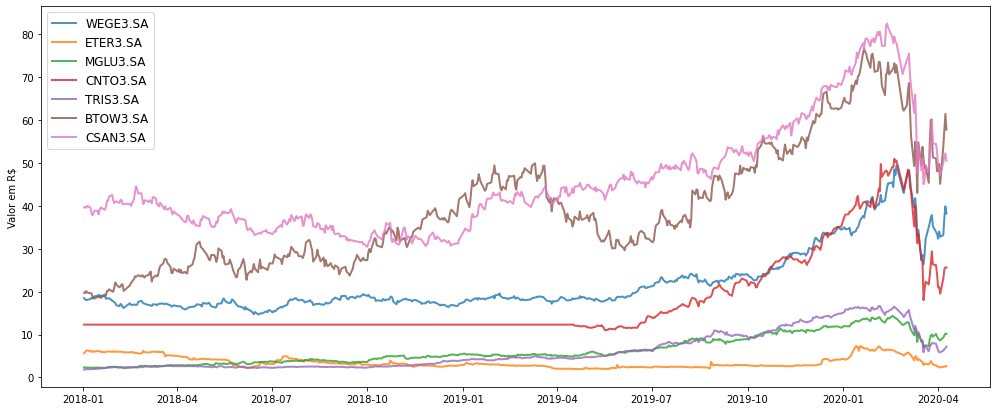

In [33]:
'''
plotar retornos 
'''
plt.figure(figsize =(17,7))
for c in cotacoes.columns.values:
    plt.plot(cotacoes.index, cotacoes[c], lw = 2, alpha = 0.8, label = c)

plt.legend(loc = 'upper left', fontsize = 12)
plt.ylabel('Valor em R$')


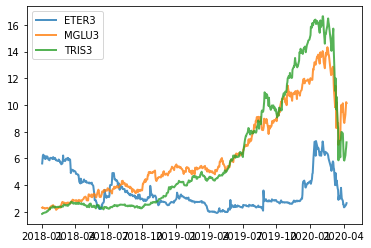

In [36]:
plt.plot(cotacoes.index, cotacoes['ETER3.SA'], lw = 2, alpha = 0.8, label = 'ETER3')
plt.plot(cotacoes.index, cotacoes['MGLU3.SA'], lw = 2, alpha = 0.8, label = c)
plt.plot(cotacoes.index, cotacoes['TRIS3.SA'], lw = 2, alpha = 0.8, label = c)
plt.legend(['ETER3','MGLU3','TRIS3'])


Text(0, 0.5, 'Retorno diário %')

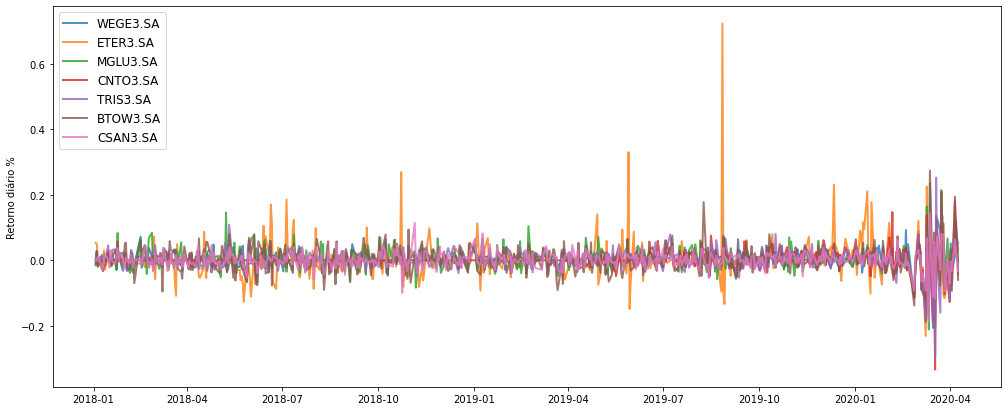

In [38]:
'''
Plotar retonor diários
'''
retornos = cotacoes.pct_change()
plt.figure(figsize =(17,7))
for c in retornos.columns.values:
    plt.plot(retornos.index, retornos[c], lw = 2, alpha = 0.8, label = c)
plt.legend(loc = 'upper left', fontsize = 12)
plt.ylabel('Retorno diário %')


In [42]:
weights = np.array([0.25,0.23,0.27])
weights

array([0.25, 0.23, 0.27])

O desvio padrão de um portfólio é dado por:  
$ \sigma_{portfólio} = \sqrt{w_{1}^2 \sigma_{1}^2 + w_{2}^2 \sigma_{2}^2 + 2w_{1}w_{2}Cov_{1,2}} $   
podemos usar a matriz abaixo para simplificar as contas

In [44]:
'''
função calcular desvpad e retorno anualizado
'''
def calcule_anualized_returns(weights, cov_matriz, mean_returns):
    returns = np.sum(weights * mean_returns) * 252
    std = np.sqrt(np.dot (weights.T , np.dot (cov_matriz *252, weights))) #* np.sqrt(252)
    return returns, std

def random_portfolios (cov_matriz, num_portfolios,mean_returns, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_records = []
    for i in range(0,num_portfolios):
        weights = np.random.random (len(papeis))
        weights /= np.sum(weights) #normalizar os pesos dos ativos
        weights_records.append(weights)
        portfolio_retuns, portfolio_std_dev =calcule_anualized_returns(weights,cov_matriz,mean_returns)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_retuns
        results[2,i] = (portfolio_retuns - risk_free_rate)  / portfolio_std_dev
    return results, weights_records

    

In [36]:
def display_ef_with_random_portfolio (mean_returns, cov_matriz, risk_free_rate, num_portfolios):
    results, weights = random_portfolios(cov_matriz,num_portfolios,mean_returns,risk_free_rate)
    
    #calcular portfolio de melhor indice sharpe
    max_sharpe_idx = np.argmax(results[2])
    std, rp, sp = results[0,max_sharpe_idx] , results[1, max_sharpe_idx], results[2,max_sharpe_idx]
    max_sharpe_alocation = pd.DataFrame(weights[max_sharpe_idx], index = cotacoes.columns, columns = ['alocação'])
    max_sharpe_alocation['alocação'] = round(max_sharpe_alocation['alocação'] *100, 2)
    max_sharpe_alocation = max_sharpe_alocation.T
    
    # calcula portifolio de menor volatilidade
    min_vol_idx = np.argmin(results[0])
    std1, rp1, sp1 = results[0, min_vol_idx], results[1, min_vol_idx], results[2,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index = cotacoes.columns, columns = ['alocação'])
    min_vol_allocation['alocação'] = round (min_vol_allocation['alocação'] * 100, 2)
    min_vol_allocation = min_vol_allocation.T
    
    #printar resultados
    print("-" * 80)
    print("Alocação de portfolio de máximo indice Sharpe")
    print("\n")
    print("Retorno Anualizado do Portfolio: ", round (rp,2))
    print("Volatitilidade: ", round(std,2))
    print("Índice Sharpe:", round(sp, 2))
    print("\n")
    print(max_sharpe_alocation)
    print("-"*80)
    
    print("-" * 80)
    print("Alocação de portfolio de mínima Volatilidade")
    print("\n")
    print("Retorno Anualizado do Portfolio: ", round (rp1,2))
    print("Volatitilidade: ", round(std1,2))
    print("Índice Sharpe:", round(sp1, 2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    
    #plot do gráfico
    plt.figure(figsize = (10,7))
    plt.scatter(results[0,:], results[1,:], c = results[2,:], cmap = 'viridis', marker = 'o', alpha = 0.3)
    plt.colorbar(label = 'Índice Sharpe')
    plt.scatter(std, rp, marker = 'x', s = 200, color = 'red', label ='Máximo Indice Sharpe')
    plt.scatter(std1,rp1, marker = 'x', s = 200, color = 'green', label= 'Mímina Volatilidade')
    plt.ylabel ('Retorno Anualizado')
    plt.xlabel ('Volatilidade Anual')
    plt.legend (loc ='upper left', labelspacing = 0.8)
    
    

--------------------------------------------------------------------------------
Alocação de portfolio de máximo indice Sharpe


Retorno Anualizado do Portfolio:  0.52
Volatitilidade:  0.49
Índice Sharpe: 1.04


Symbols   WEGE3.SA  ETER3.SA  MGLU3.SA  CNTO3.SA  TRIS3.SA  BTOW3.SA  CSAN3.SA
alocação      51.2      0.31     14.01      6.77     20.04      5.17       2.5
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Alocação de portfolio de mínima Volatilidade


Retorno Anualizado do Portfolio:  0.37
Volatitilidade:  0.45
Índice Sharpe: 0.78


Symbols   WEGE3.SA  ETER3.SA  MGLU3.SA  CNTO3.SA  TRIS3.SA  BTOW3.SA  CSAN3.SA
alocação     36.83      4.78      4.38      1.16      4.08     12.27      36.5
--------------------------------------------------------------------------------


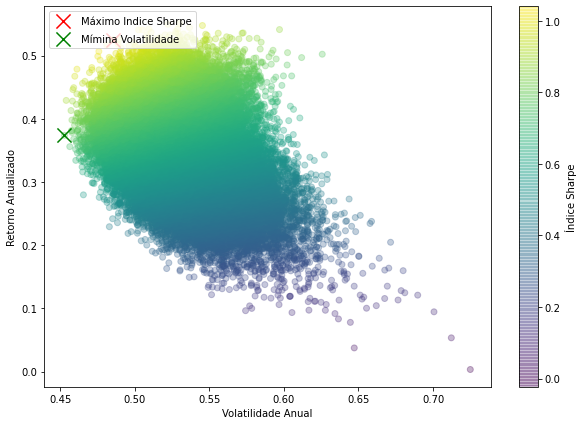

In [58]:
#input de dados 
risk_free_rate = 0.02 #3.2% - CDI
retornos =  np.log(cotacoes / cotacoes.shift(1)) #log return #cotacoes.pct_change()
mean_returns = retornos.mean()
cov_matriz = retornos.cov()
num_portfolios = 80000

#chamar função
display_ef_with_random_portfolio (mean_returns, cov_matriz, risk_free_rate, num_portfolios)
